## 三维曲线图

- [view_init(elev, azim)](https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=view_init#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init): 设置视角，elevation和azimuth

注意：使用如下命令安装最新版本，我这里的版本是3.3.2

```bash
python -m pip install -U pip
python -m pip install -U matplotlib
```

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
# from mpl_toolkits.mplot3d import Axes3D # 对于绘制三维图，这个很重要！！！(对于3.3.2版本的mpl可以不用这句导入命令)

## 简单例子
mpl的默认设置，很简陋

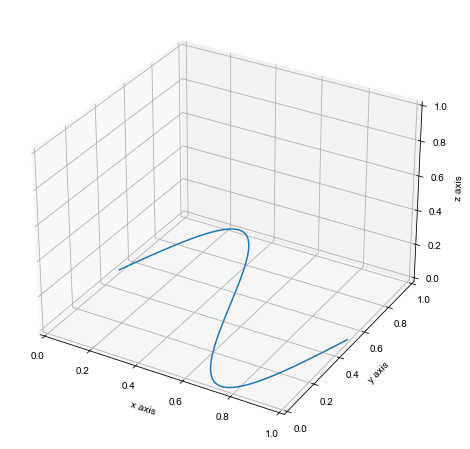

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_1_basic1.pdf')
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

## 坐标轴自定义-根据自己的喜好进行美化

这是三维绘图的重点之一！！！

In [3]:
from matplotlib.text import TextPath
from matplotlib.font_manager import FontProperties
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.patches import PathPatch
import numpy as np
def text3d(ax, xyz, s, zdir="z", size=0.1, angle=0,font='Arial',weight='normal',ha='left',va='center', **kwargs):
    x, y, z = xyz
    xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
    xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]
    xlen,ylen,zlen=xmax-xmin, ymax-ymin, zmax-zmin
    minLen_axis=np.min([xlen,ylen,zlen])
    aspect=ax.get_box_aspect()
    fontscale=1
    if   zdir == "y": xy, z, fontscale = (x,z), y, (xlen/zlen)/(aspect[0]/aspect[2])
    elif zdir == "x": xy, z, fontscale = (y,z), x, (ylen/zlen)/(aspect[1]/aspect[2])
    else:             xy, z, fontscale = (x,y), z, (xlen/ylen)/(aspect[0]/aspect[1])
    path = TextPath((0, 0), s, size=size, prop = FontProperties(family=font,weight=weight))
    V = path.vertices
    if(ha=='center'):
        V[:,0] -= (V[:,0].max() - V[:,0].min())/2 # 居中
    elif(ha=='right'):
        V[:,0] -= V[:,0].max()
    if(va=='center'):
        V[:,1] -= (V[:,1].max() - V[:,1].min())/2 # 居中
    elif(va=='top'):
        V[:,1] -= V[:,1].max()
    trans = Affine2D().rotate(angle/180*np.pi).scale(1,1/fontscale).translate(xy[0], xy[1])
    path = PathPatch(trans.transform_path(path),clip_on=False, **kwargs)
    ax.add_patch(path)
    art3d.pathpatch_2d_to_3d(path, z=z, zdir=zdir)
def niceAxis(ax, lw_major=0.5,lw_minor=0.25,color_major="0.50",color_minor="0.75",
             alpha_pane=0.2,fill_pane=True,ec_pane='None',label3D=True,fs_label=0.1,
             length_major=0.05,length_minor=0.02,offset_axislabel=4,frame_on=True,scaled=True):
    # 坐标轴自定义
    xlim,ylim,zlim=ax.get_xlim(),ax.get_ylim(),ax.get_zlim()
    xmin,xmax,ymin,ymax,zmin,zmax=xlim[0],xlim[1],ylim[0],ylim[1],zlim[0],zlim[1]
    # 1. 根据坐标轴范围设置坐标轴比例：假设xyz三轴以自然比例显示
    xlen,ylen,zlen=xmax-xmin, ymax-ymin, zmax-zmin
    minLen_axis=np.min([xlen,ylen,zlen])
    xratio,yratio=[xlen,ylen]/minLen_axis
    if(scaled):
        ax.set_box_aspect((4*xratio,4*yratio,3))  # 默认比例是4：4：3
    # 3. 重新定义网格线：注意mpl的三维绘图目前不支持grid()函数分别定义主刻度网格和副刻度网格属性
    ax.grid(False) # 首先关闭默认网格
    zorder_grid=-50
    ax.get_figure().canvas.draw()
    # 主刻度线
    linewidth, color, length = lw_major, color_major, length_major
    # x轴
    tickmin,tickmax,tickaxis,axislim=xmin,xmax,ax.xaxis,ax.get_xlim()
    tickpos1,tickpos2=[ymin,ymax,ymax],[zmin,zmin,zmax]
    for tick,label in zip(ax.get_xticks(),ax.get_xticklabels()):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot([tick,tick,tick],tickpos1,tickpos2, lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            text3d(ax, (tick, ymin-length*1.2*minLen_axis, zmin), label.get_text(),size=fs_label*minLen_axis, fc=label.get_color(), ec="None", ha='center',va='top')
            label.set_alpha(0)
            ax.plot([tick,tick],[ymin,ymin-length*minLen_axis],[zmin,zmin],lw=linewidth,color=label.get_color())
    if(label3D):
        ax.plot([xmin,xmax],[ymin,ymin],[zmin,zmin],lw=linewidth,color=label.get_color())
        text3d(ax, ((xmin+xmax)/2, ymin-length*offset_axislabel*minLen_axis, zmin), ax.get_xlabel(),
               size=fs_label*minLen_axis, fc=label.get_color(), ec="None",ha='center',va='top')
    # y轴
    tickmin,tickmax,tickaxis,axislim=ymin,ymax,ax.yaxis,ax.get_ylim()
    tickpos1,tickpos2=[xmin,xmin,xmax],[zmax,zmin,zmin]
    for tick,label in zip(ax.get_yticks(),ax.get_yticklabels()):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot(tickpos1,[tick,tick,tick],tickpos2,
               lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            text3d(ax, (xmax+length*1.2*minLen_axis, tick, zmin), label.get_text(),size=fs_label*minLen_axis, 
                   fc=label.get_color(), ec="None",ha='center',va='top',angle=90)
            label.set_alpha(0)
            ax.plot([xmax,xmax+length*minLen_axis],[tick,tick],[zmin,zmin],lw=linewidth,color=label.get_color())
    if(label3D):
        ax.plot([xmax,xmax],[ymin,ymax],[zmin,zmin],lw=linewidth,color=label.get_color())
        text3d(ax, (xmax+length*offset_axislabel*minLen_axis,(ymin+ymax)/2, zmin), ax.get_ylabel(),
               size=fs_label*minLen_axis, fc=label.get_color(), ec="None",ha='center',va='top',angle=90)
        
    # z轴
    tickmin,tickmax,tickaxis,axislim=zmin,zmax,ax.zaxis,ax.get_zlim()
    tickpos1,tickpos2=[xmin,xmin,xmax],[ymin,ymax,ymax]
    for tick,label in zip(ax.get_zticks(),ax.get_zticklabels()):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot(tickpos1,tickpos2,[tick,tick,tick],
               lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            text3d(ax, (xmax+1.2*length*minLen_axis,ymax,tick), label.get_text(),zdir='y',size=fs_label*minLen_axis, 
                   fc=label.get_color(), ec="None",ha='center',va='top',angle=90)
            label.set_alpha(0)
            ax.plot([xmax,xmax+length*minLen_axis],[ymax,ymax],[tick,tick],lw=linewidth,color=label.get_color(),clip_on=False)
    if(label3D):
        ax.plot([xmax,xmax],[ymax,ymax],[zmin,zmax],lw=linewidth,color=label.get_color())
        text3d(ax, (xmax+length*offset_axislabel*minLen_axis,ymax, (zmin+zmax)/2), ax.get_zlabel(),zdir='y',
               size=fs_label*minLen_axis, fc=label.get_color(), ec="None",ha='center',va='top',angle=90)
    if(frame_on==True):
        ax.plot([xmin,xmin,xmin,xmax,xmax],[ymin,ymin,ymax,ymax,ymax],[zmin,zmax,zmax,zmax,zmin],color=label.get_color(),lw=linewidth)
        ax.plot([xmin,xmin,xmin],[ymin,ymax,ymax],[zmin,zmin,zmax],color=label.get_color(),lw=linewidth,ls='dashed')
        ax.plot([xmin,xmax],[ymax,ymax],[zmin,zmin],color=label.get_color(),lw=linewidth,ls='dashed')
    # 副刻度线
    linewidth, color, length = lw_minor, color_minor,length_minor
    # x轴
    tickmin,tickmax,tickaxis,axislim=xmin,xmax,ax.xaxis,ax.get_xlim()
    tickpos1,tickpos2=[ymin,ymax,ymax],[zmin,zmin,zmax]
    for tick in tickaxis.get_minor_locator().tick_values(tickmin,tickmax):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot([tick,tick,tick],tickpos1,tickpos2,
               lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            ax.plot([tick,tick],[ymin,ymin-length*minLen_axis],[zmin,zmin],lw=linewidth,color=label.get_color())
    # y轴
    tickmin,tickmax,tickaxis,axislim=ymin,ymax,ax.yaxis,ax.get_ylim()
    tickpos1,tickpos2=[xmin,xmin,xmax],[zmax,zmin,zmin]
    for tick in tickaxis.get_minor_locator().tick_values(tickmin,tickmax):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot(tickpos1,[tick,tick,tick],tickpos2,
               lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            ax.plot([xmax,xmax+length*minLen_axis],[tick,tick],[zmin,zmin],lw=linewidth,color=label.get_color())
    # z轴
    tickmin,tickmax,tickaxis,axislim=zmin,zmax,ax.zaxis,ax.get_zlim()
    tickpos1,tickpos2=[xmin,xmin,xmax],[ymin,ymax,ymax]
    for tick in tickaxis.get_minor_locator().tick_values(tickmin,tickmax):
        if((tick<axislim[0]) | (tick>axislim[1])):
            continue
        ax.plot(tickpos1,tickpos2,[tick,tick,tick],
               lw=linewidth,color=color,zorder=zorder_grid)
        if(label3D):
            ax.plot([xmax,xmax+length*minLen_axis],[ymax,ymax],[tick,tick],lw=linewidth,color=label.get_color(),clip_on=False)
    # 3. 设置ticks和labels以及spines和panes
    for axis,inward_factor in zip([ax.xaxis,ax.yaxis,ax.zaxis],[0.3,0.2,0.2]):
        axis._axinfo['tick']['inward_factor'] = inward_factor
        axis._axinfo['tick']['outward_factor'] = 0
    ax.tick_params(which='minor', color=(0,0,1,0) ) # 取消副刻度
    # xaxis
    color,alpha,pad,axis,waxis=(1,0,0),alpha_pane,-3,ax.xaxis,ax.w_xaxis
    ax.tick_params(axis='x', which='major', pad=pad)
    axis.set_pane_color(color+(alpha,))
    axis.pane.set_edgecolor(ec_pane)
    axis.pane.fill = fill_pane
    waxis.line.set_color(ax.get_xticklines()[0].get_color())
    # yaxis
    color,alpha,pad,axis,waxis=(0,1,0),alpha_pane,-3,ax.yaxis,ax.w_yaxis
    ax.tick_params(axis='y', which='major', pad=pad)
    axis.set_pane_color(color+(alpha,))
    axis.pane.set_edgecolor(ec_pane)
    axis.pane.fill = fill_pane
    waxis.line.set_color(ax.get_yticklines()[0].get_color())
    # zaxis
    color,alpha,pad,axis,waxis=(0,0,1),alpha_pane,0,ax.zaxis,ax.w_zaxis
    ax.tick_params(axis='z', which='major', pad=pad)
    axis.set_pane_color(color+(alpha,))
    axis.pane.set_edgecolor(ec_pane)
    axis.pane.fill = fill_pane
    waxis.line.set_color(ax.get_zticklines()[0].get_color())
    if(label3D):
        ax.axis('off')
    

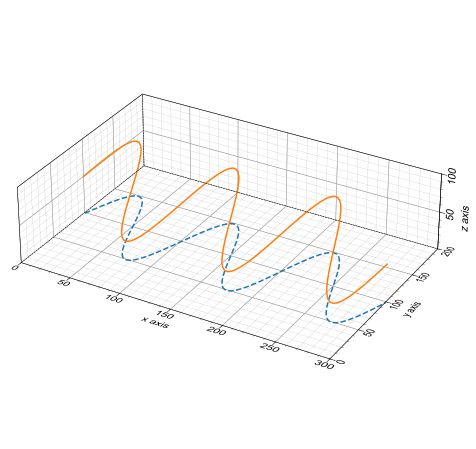

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
# view angle
ax.view_init(elev=30, azim=-60) # default (30, -60)
# Plot a sin curve using the x and y axes.
x = np.linspace(0, 300, 100)
y = np.sin(x * 2 * np.pi) *50 + 100
ax.plot(x, y,ls='dashed')
ax.plot(x, y,y/2)
ax.set_xlabel('x axis',labelpad=0)
ax.set_ylabel('y axis',labelpad=-5)
ax.set_zlabel('z axis',labelpad=-5)
ax.set_xlim(0,300)
ax.set_ylim(0,200)
ax.set_zlim(1,100)
# 设置坐标轴刻度间隔
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.zaxis.set_major_locator(MultipleLocator(50))
ax.zaxis.set_minor_locator(MultipleLocator(10))
# ax.tick_params(color='k')

# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=False,label3D=True,scaled=True)


# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_1_basic2.pdf')
plt.savefig(fname_fig,transparent=True)
# os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

## 实例

洛伦兹曲线

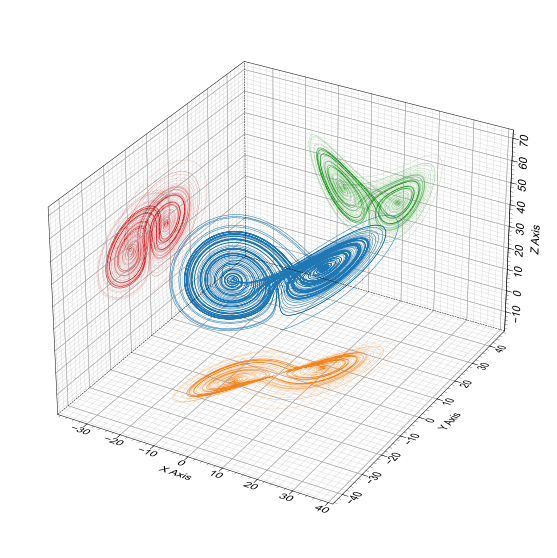

In [11]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.set_xlim(xs.min()-20,xs.max()+20)
ax.set_ylim(ys.min()-20,ys.max()+20)
ax.set_zlim(zs.min()-20,zs.max()+20)
# 设置坐标轴刻度间隔
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.zaxis.set_major_locator(MultipleLocator(10))
ax.zaxis.set_minor_locator(MultipleLocator(2))

# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=False,label3D=True,fs_label=0.04,length_major=0.02,length_minor=0.01)

# 再添加几条曲线
ax.plot(xs, ys, ax.get_zlim()[0], lw=0.2,zorder=-400,ls='dashed')
ax.plot(xs, zs,ys*0+ax.get_ylim()[1],zdir='y', lw=0.2,zorder=-400,ls='dashed')
ax.plot(xs=xs*0+ax.get_xlim()[0], ys=ys, zs=zs, lw=0.2,zorder=-400,ls='dashed')

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_1_example1.pdf')
plt.savefig(fname_fig,transparent=True)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()